# 3. 한국거래소 전체 종목 분석2 - 색인

## 3.1 기본적인 라이브러리 호출 및 설정

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

# 일반 폰트 설정
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

# 마이너스 폰트 설정
rc('axes', unicode_minus=False)

# 그래프 스타일 설정
plt.style.use('ggplot')

# retina display 적용 (선명하게)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

df = pd.read_csv('krx.csv')

<br>

## 3.2 기본적인 데이터 색인

### 3.2.1 케이맨 제도에 있는 회사 찾기

In [12]:
df[df['Region'] == '케이맨 제도']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
283,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도
317,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도
1249,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도
1501,900140,KOSPI,엘브이엠씨홀딩스,자동차 판매업,지주회사,2010-11-30,12월,"오세영, 노성석, 김선발 (각자 대표이사)",http://www.lvmcholdings.net,케이맨 제도
2138,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도


<br>

### 3.2.2 1970년 이전에 상장한 기업 찾기

In [14]:
# ListingYear 파생변수 생성
df['ListingDate'] = pd.to_datetime(df['ListingDate'])
df['ListingYear'] = df['ListingDate'].dt.year
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시,2015.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0


In [16]:
df[df['ListingYear'] < 1970].head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
15,000120,KOSPI,CJ대한통운,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,박근희,http://www.cjlogistics.com,서울특별시,1956.0
34,001530,KOSPI,DI동일,상품 중개업,"면사,화섬사,면포,혼방포,스포츠웨어용 신합섬 제조,도매,수출",1964-01-04,12월,"서태원, 손재선",http://www.dong-il.com,서울특별시,1964.0
162,004250,KOSPI,NPC,플라스틱제품 제조업,"산업용기프라스틱제품(플라스틱 파렛트,시트 파렛트) 제조,판매",1969-09-08,12월,최병민,http://www.npc.co.kr,경기도,1969.0
266,000050,KOSPI,경방,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시,1956.0
526,001440,KOSPI,대한전선,절연선 및 케이블 제조업,"전력선,통신케이블,적산계기,스텐레스압연제품,광케이블,초고압선,알루미늄 제조,도매/전기공사",1968-12-27,12월,나형균,http://www.taihan.com,경기도,1968.0


<br>

### 3.2.3 2020년 상장한 서울특별시에 소재한 코스피 종목 찾기

In [25]:
df[(df['ListingYear'] == 2020) & 
   (df['Region'] == '서울특별시') & 
   (df['Market'] == 'KOSPI')].head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
44,365550,KOSPI,ESR켄달스퀘어리츠,부동산 임대 및 공급업,부동산투자,2020-12-23,05월,박래익,http://www.esrks-reit.com,서울특별시,2020.0
824,357250,KOSPI,미래에셋맵스리츠,부동산 임대 및 공급업,부동산 임대업,2020-08-05,11월,김호식,http://www.maps1reit.miraeasset.com,서울특별시,2020.0
932,352820,KOSPI,빅히트,오디오물 출판 및 원판 녹음업,"음악 기획/제작, 퍼블리싱, 아티스트 매니지먼트",2020-10-15,12월,방시혁,http://www.bighitcorp.com,서울특별시,2020.0
1451,244920,KOSPI,에이플러스에셋,보험 및 연금관련 서비스업,보험대리 및 중개업,2020-11-20,12월,박경순,NaN,서울특별시,2020.0
1795,350520,KOSPI,이지스레지던스리츠,부동산 임대 및 공급업,"부동산투자, 취득, 매매, 임대",2020-08-05,06월,박영희,http://igisresidencereit.com/,서울특별시,2020.0


<br>

## 3.3 지역별 섹터

- `Sector`, `Region`으로 `crosstab` 연산을 한다.

In [27]:
df_sr = pd.crosstab(df['Sector'], df['Region'])
df_sr

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,7,1,0,1,0,12,11,...,0,4,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,1,0,1,0,1,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0


<br>

## 3.4 컬럼과 인덱스 값으로 색인하기

- 특정 컬럼만 가져오기

In [28]:
df_sr['서울특별시']

Sector
1차 비철금속 제조업             3
1차 철강 제조업              11
가구 제조업                  3
가전제품 및 정보통신장비 소매업       1
가정용 기기 제조업              1
                       ..
해상 운송업                  5
해체, 선별 및 원료 재생업         0
화학섬유 제조업                6
환경 정화 및 복원업             0
회사 본부 및 경영 컨설팅 서비스업     7
Name: 서울특별시, Length: 158, dtype: int64

In [30]:
df_sr[['서울특별시', '경기도', '인천광역시']]

Region,서울특별시,경기도,인천광역시
Sector,,,
1차 비철금속 제조업,3,7,0
1차 철강 제조업,11,4,4
가구 제조업,3,4,1
가전제품 및 정보통신장비 소매업,1,0,0
가정용 기기 제조업,1,6,0
...,...,...,...
해상 운송업,5,0,0
"해체, 선별 및 원료 재생업",0,1,0
화학섬유 제조업,6,1,0


<br>

## 3.5 특정 행만 가져오기

- `df.loc[행]`
- `df.loc[행, 열]`
- `df.loc[조건식, 열]`

<br>

### 3.5.1 `df.loc[행]`

In [34]:
df_sr.loc['소프트웨어 개발 및 공급업']

Region
강원도         0
경기도        38
경상남도        0
경상북도        0
광주광역시       1
대구광역시       0
대전광역시       1
미국          0
부산광역시       1
서울특별시      89
세종특별자치시     0
울산광역시       0
인천광역시       0
일본          2
전라남도        0
전라북도        0
제주특별자치도     0
충청남도        0
충청북도        2
케이맨 제도      0
홍콩          1
Name: 소프트웨어 개발 및 공급업, dtype: int64

In [35]:
df_sr.loc['소프트웨어 개발 및 공급업'].sort_values()

Region
강원도         0
충청남도        0
제주특별자치도     0
전라북도        0
전라남도        0
인천광역시       0
울산광역시       0
케이맨 제도      0
세종특별자치시     0
미국          0
대구광역시       0
경상북도        0
경상남도        0
대전광역시       1
광주광역시       1
부산광역시       1
홍콩          1
일본          2
충청북도        2
경기도        38
서울특별시      89
Name: 소프트웨어 개발 및 공급업, dtype: int64

In [36]:
df_sr.loc['소프트웨어 개발 및 공급업'].sort_values(ascending=False)

Region
서울특별시      89
경기도        38
충청북도        2
일본          2
홍콩          1
부산광역시       1
광주광역시       1
대전광역시       1
경상남도        0
경상북도        0
대구광역시       0
미국          0
세종특별자치시     0
케이맨 제도      0
울산광역시       0
인천광역시       0
전라남도        0
전라북도        0
제주특별자치도     0
충청남도        0
강원도         0
Name: 소프트웨어 개발 및 공급업, dtype: int64

<br>

### 3.5.2 `df.loc[[행1, 행2]]`

In [39]:
df_sr.loc[['소프트웨어 개발 및 공급업', '금융 지원 서비스업', '의약품 제조업']]

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
소프트웨어 개발 및 공급업,0,38,0,0,1,0,1,0,1,89,...,0,0,2,0,0,0,0,2,0,1
금융 지원 서비스업,0,0,0,0,0,0,0,0,0,71,...,0,0,0,0,0,0,0,0,0,0
의약품 제조업,5,35,1,0,0,0,2,0,1,38,...,0,2,0,0,0,0,2,5,0,0


<br>

### 3.5.3 `df.loc[행, 열]`

In [40]:
df_sr.loc[['소프트웨어 개발 및 공급업', '금융 지원 서비스업', '의약품 제조업'], ['서울특별시']]

Region,서울특별시
Sector,
소프트웨어 개발 및 공급업,89
금융 지원 서비스업,71
의약품 제조업,38


In [41]:
df_sr.loc[['소프트웨어 개발 및 공급업', '금융 지원 서비스업', '의약품 제조업'], 
          ['서울특별시', '경기도', '인천광역시']]

Region,서울특별시,경기도,인천광역시
Sector,,,
소프트웨어 개발 및 공급업,89,38,0
금융 지원 서비스업,71,0,0
의약품 제조업,38,35,2


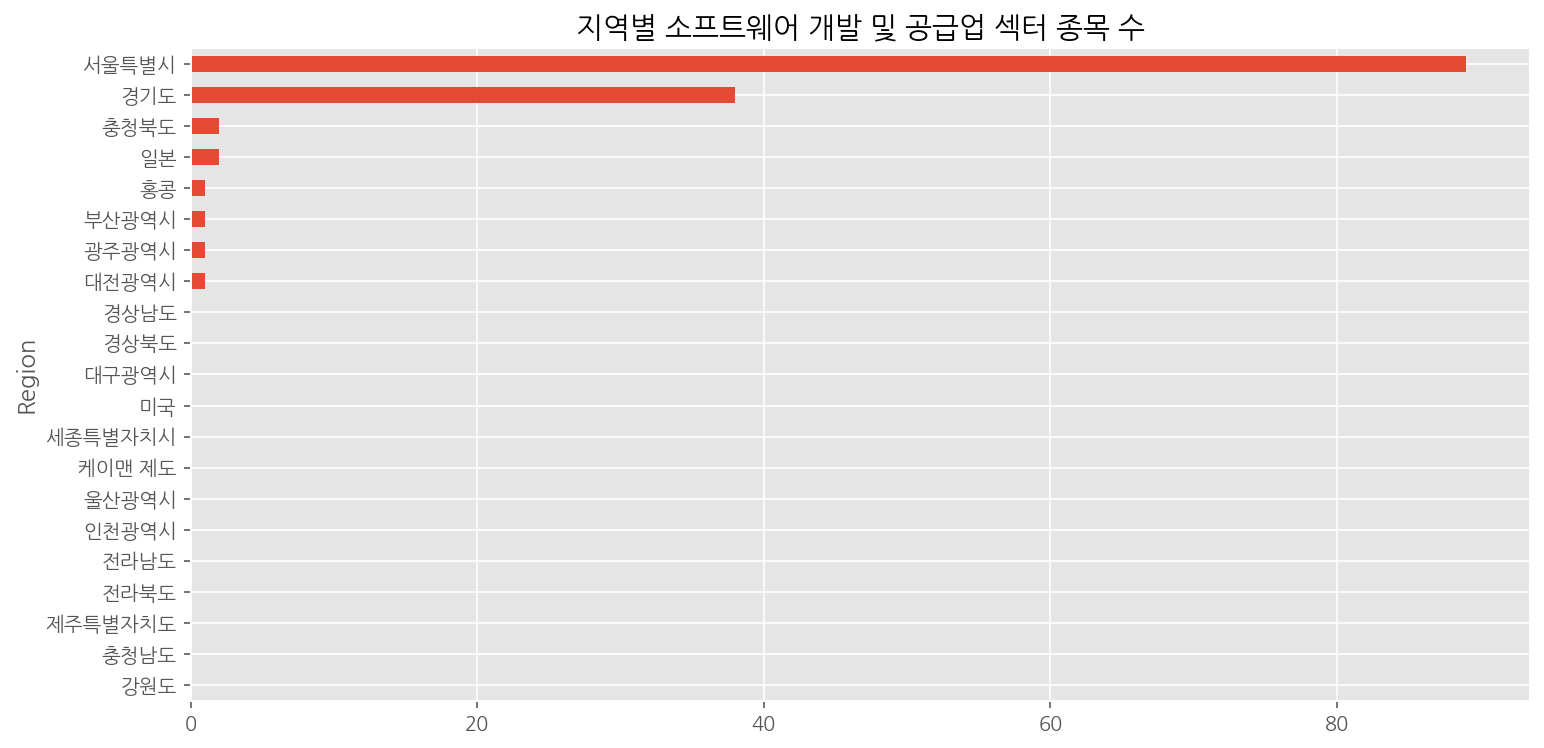

In [53]:
# '소프트웨어 개발 및 공급업' 만 가져와서 막대 그래프 그리기
df_sr.loc['소프트웨어 개발 및 공급업'].sort_values().plot.barh(figsize=(12,6), title='지역별 소프트웨어 개발 및 공급업 섹터 종목 수')
plt.show()

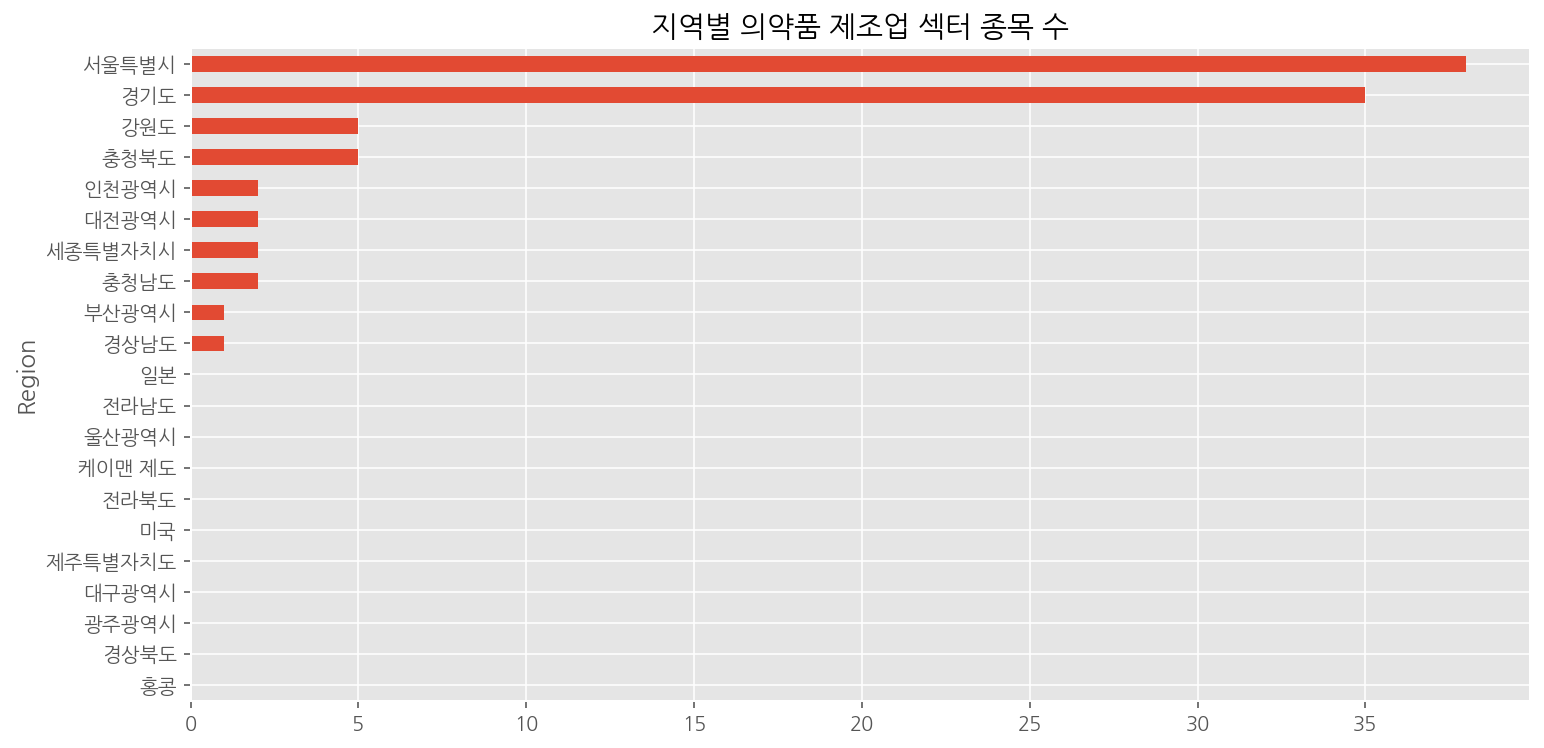

In [54]:
# '의약품 제조업' 만 가져와서 막대 그래프 그리기
df_sr.loc['의약품 제조업'].sort_values().plot.barh(figsize=(12,6), title='지역별 의약품 제조업 섹터 종목 수')
plt.show()

<br>

### 3.5.4 `df.iloc[]`

- `df.iloc[행인덱스]`
- `df.iloc[행인덱스, 열인덱스]`

In [56]:
df_sr.iloc[:,:]

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,7,1,0,1,0,12,11,...,0,4,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,1,0,1,0,1,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0


In [57]:
df_sr.iloc[:5,:5]

Region,강원도,경기도,경상남도,경상북도,광주광역시
Sector,,,,,
1차 비철금속 제조업,0,7,1,1,0
1차 철강 제조업,0,4,11,7,1
가구 제조업,0,4,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1
